In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

__Dataset:__ https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

Sales of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and 80 explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#get mean & median sales prices

print('Mean sale price for all properties: {}'.format(train.SalePrice.mean()))
print('Median sale price for all properties: {}'.format(train.SalePrice.median()))

Mean sale price for all properties: 180921.19589041095
Median sale price for all properties: 163000.0


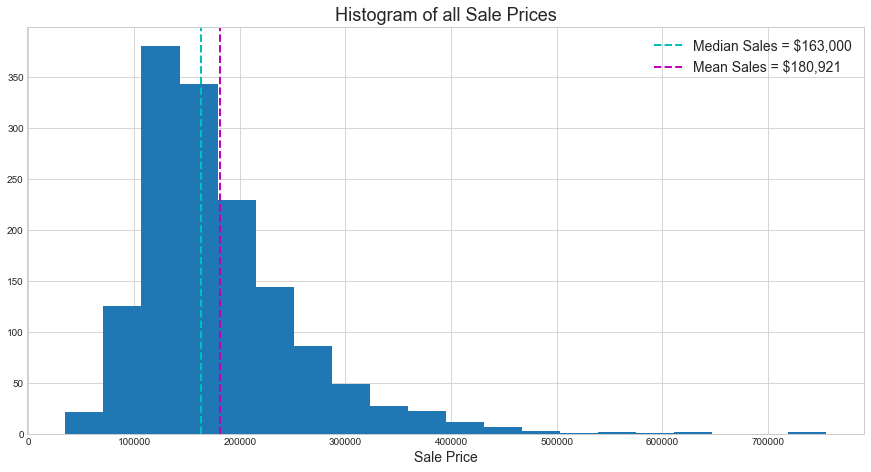

In [19]:
#histogram of all sales prices
sns.set_style('whitegrid')
plt.figure(figsize = (15,7.5))
plt.hist(train['SalePrice'], bins = 20)
plt.axvline(train.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median Sales = $163,000')
plt.axvline(train.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean Sales = $180,921')
plt.xlabel('Sale Price', size=14)
plt.title('Histogram of all Sale Prices', size=18)
plt.legend(prop={'size':14})
plt.show()

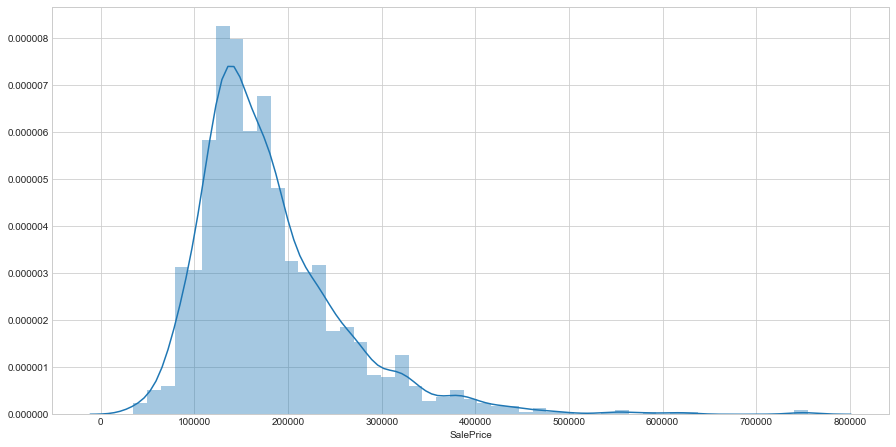

In [20]:
#different cooler looking histogram
plt.figure(figsize=(15,7.5))
sns.distplot(train['SalePrice']);

__Thoughts on distribution:__ distribution is not normal, obvious skew

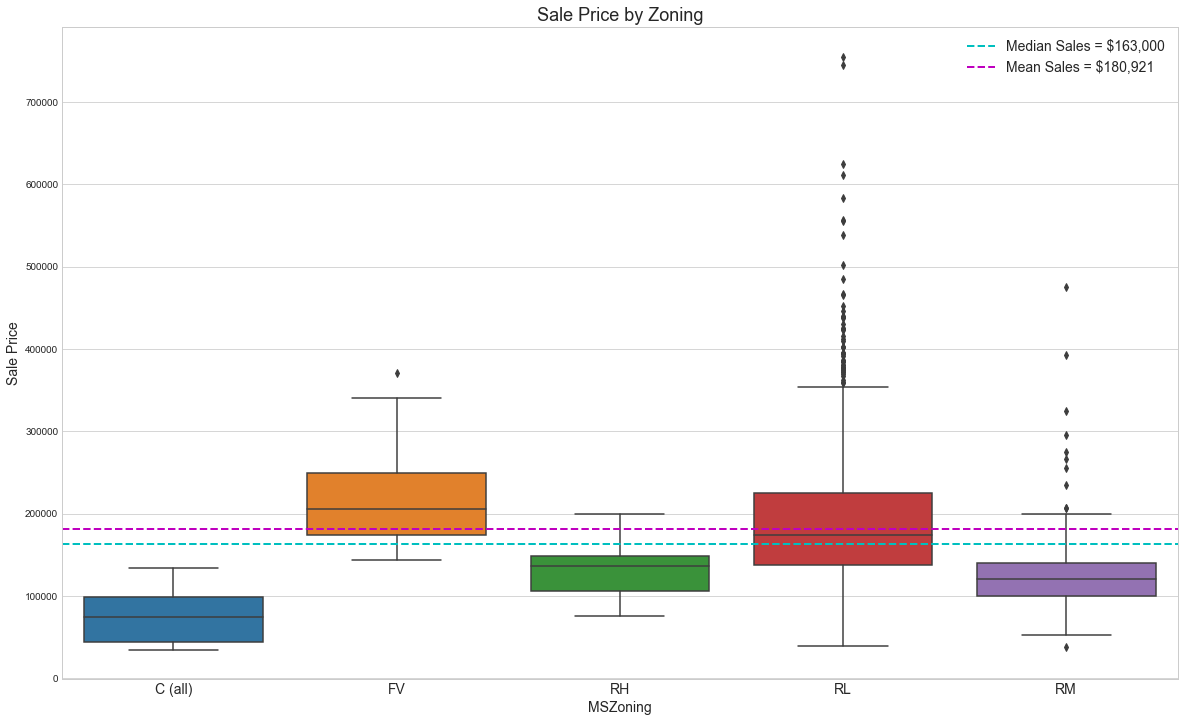

In [21]:
#sales price by zoning
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))

order = sorted(train.MSZoning.unique())

sns.boxplot(x='MSZoning', y='SalePrice', data=train, order=order)
plt.axhline(train.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median Sales = $163,000')
plt.axhline(train.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean Sales = $180,921')
plt.xticks(size=14)
plt.xlabel('MSZoning', size=14)
plt.ylabel('Sale Price', size=14)
plt.title('Sale Price by Zoning', size=18)
plt.legend(prop={'size':14})

plt.show()

__Variables__

RL = Residential Low Density

RM = Residential Medium Density

C = Commercial

FV = Floating Village Residential

RH = Residential High Density

__Thoughts on zoning:__ zoning has an impact on sale price

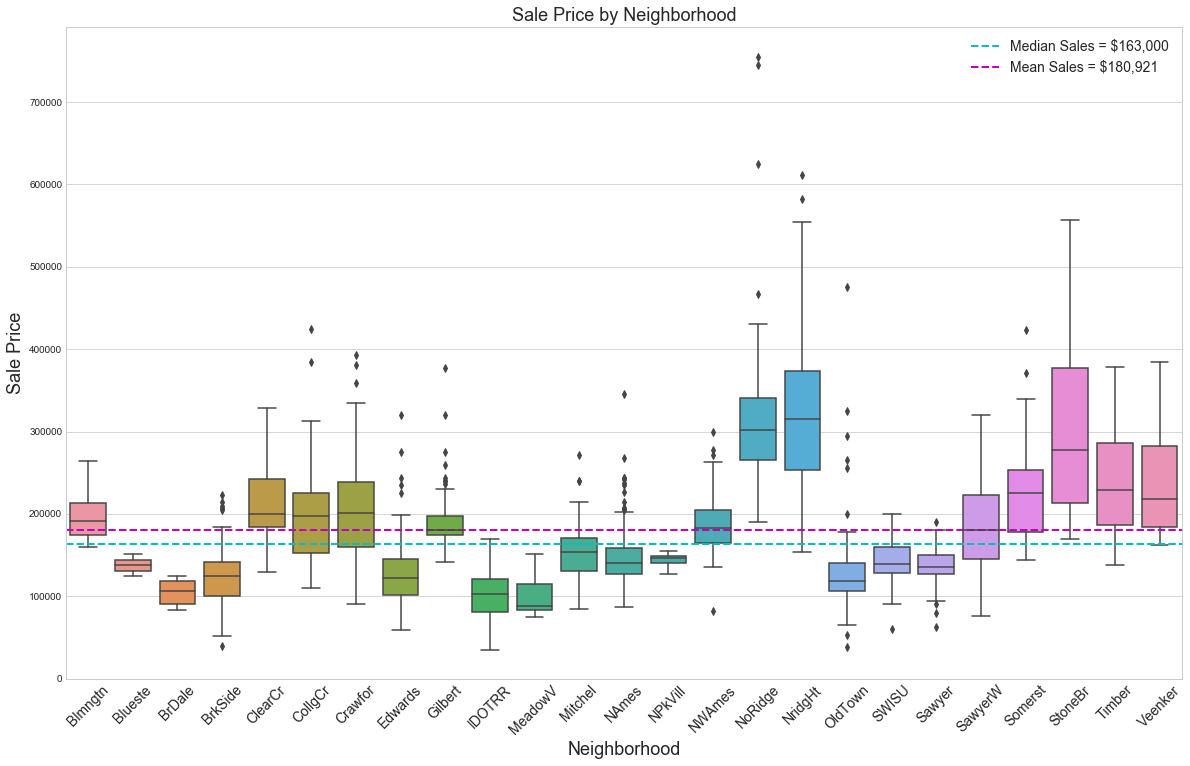

In [22]:
#sale price by neighborhood
plt.figure(figsize = (20,12))

order = sorted(train.Neighborhood.unique())

sns.boxplot(x='Neighborhood', y='SalePrice', data=train, order=order)
plt.axhline(train.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median Sales = $163,000')
plt.axhline(train.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean Sales = $180,921')
plt.xticks(size=14, rotation=45)
plt.xlabel('Neighborhood', size=18)
plt.ylabel('Sale Price', size=18)
plt.title('Sale Price by Neighborhood', size=18)
plt.legend(prop={'size':14})

plt.show()

__Thoughts on neighborhood:__ as one would expect neighborhood has an impact on sale price, and some neighborhoods show more variance in their house prices

In [8]:
neighborhood_counts = pd.DataFrame(train.Neighborhood.value_counts())
neighborhood_counts.head(3)

,Neighborhood
NAmes,225
CollgCr,150
OldTown,113


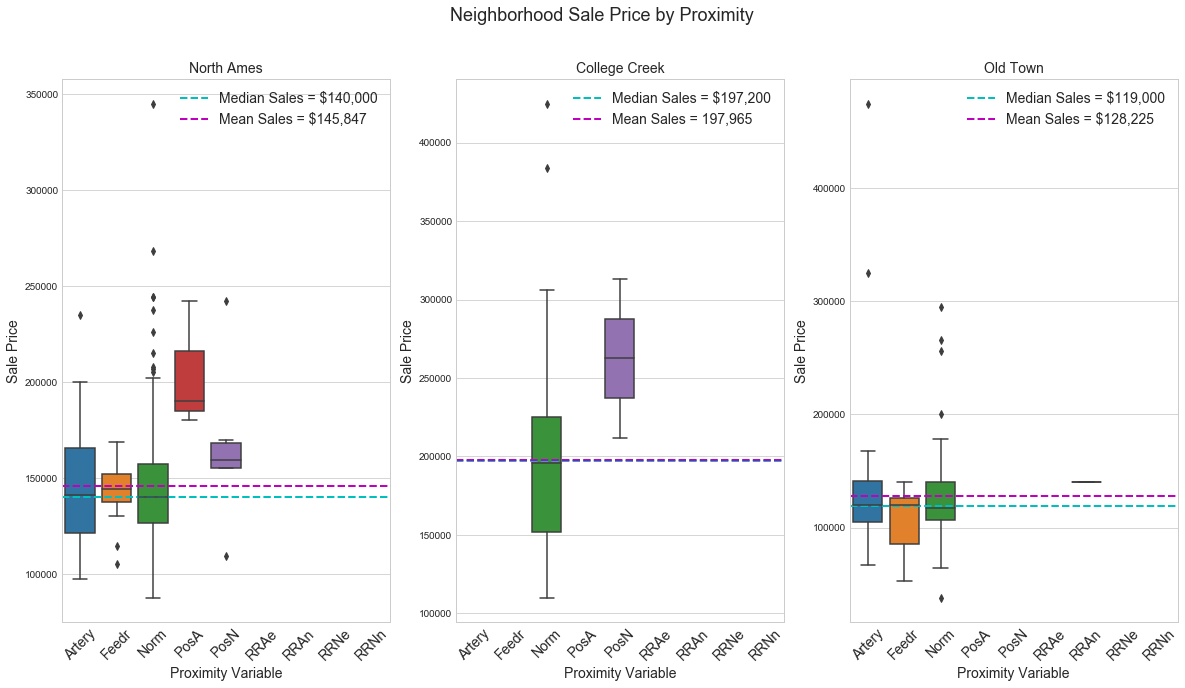

In [23]:
#sales price by proximity for largest 3 neighborhoods

NAmes = train.loc[lambda df: train['Neighborhood']=='NAmes']
#print(NAmes.SalePrice.median())
#print(NAmes.SalePrice.mean())

CollgCr = train.loc[lambda df: train['Neighborhood']=='CollgCr']
#print(CollgCr.SalePrice.median())
#print(CollgCr.SalePrice.mean())

OldTown = train.loc[lambda df: train['Neighborhood']=='OldTown']
#print(OldTown.SalePrice.median())
#print(OldTown.SalePrice.mean())

order = sorted(train.Condition1.unique())

plt.figure(figsize=(20,10))
plt.suptitle('Neighborhood Sale Price by Proximity', size=18)

plt.subplot(1,3,1)
sns.boxplot(x='Condition1', y='SalePrice', data=NAmes, order=order)
plt.axhline(NAmes.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median Sales = $140,000')
plt.axhline(NAmes.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean Sales = $145,847')
plt.xticks(size=14, rotation=45)
plt.xlabel('Proximity Variable', size=14)
plt.ylabel('Sale Price', size=14)
plt.title('North Ames', size=14)
plt.legend(prop={'size':14})

plt.subplot(1,3,2)
sns.boxplot(x='Condition1', y='SalePrice', data=CollgCr, order=order)
plt.axhline(CollgCr.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median Sales = $197,200')
plt.axhline(CollgCr.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean Sales = 197,965')
plt.xticks(size=14, rotation=45)
plt.xlabel('Proximity Variable', size = 14)
plt.ylabel('Sale Price', size = 14)
plt.title('College Creek', size = 14)
plt.legend(prop={'size':14})

plt.subplot(1,3,3)
sns.boxplot(x='Condition1', y='SalePrice', data=OldTown, order=order)
plt.axhline(OldTown.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median Sales = $119,000')
plt.axhline(OldTown.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean Sales = $128,225')
plt.xticks(size=14, rotation=45)
plt.xlabel('Proximity Variable', size=14)
plt.ylabel('Sale Price', size=14)
plt.title('Old Town', size=14)
plt.legend(prop={'size':14})

plt.show()

__Variables__

Artery = Adjacent to arterial street

Feedr = Adjacent to feeder street

Norm = Normal

PosA = Adjacent to postive off-site feature

PosN = Near positive off-site feature--park, greenbelt, etc.

RRNn = Within 200' of North-South Railroad

RRAn = Adjacent to North-South Railroad

RRNe = Within 200' of East-West Railroad

RRAe = Adjacent to East-West Railroad

__Thoughts on proximity variable:__ being positive feature proximity (near & adjancent) puts upward pressure on sale price. Being near an artery or feeder road don't seem to have much impact compared to mean/median sales prices

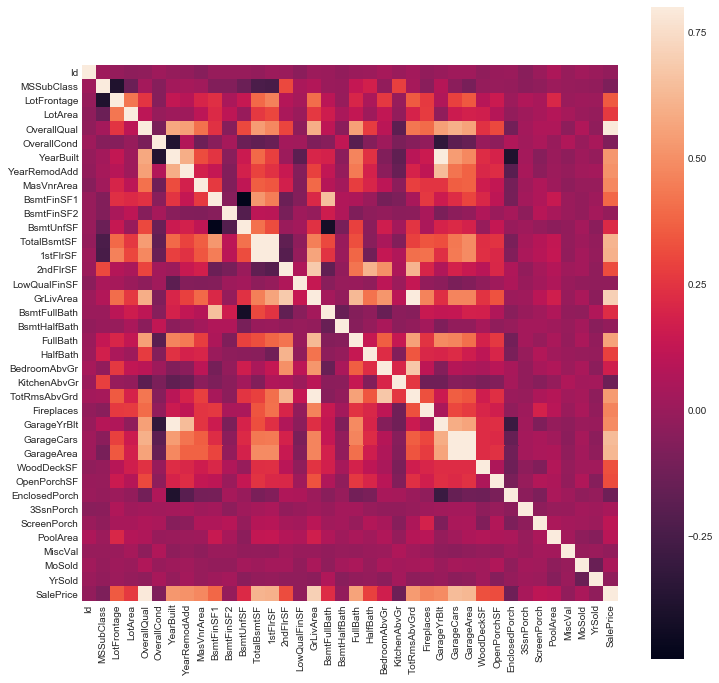

In [10]:
#look at correlation to sale price for numerical variables
corrmat = train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.8, square=True);

In [11]:
print(corrmat['SalePrice'].sort_values(ascending=False).head(10))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


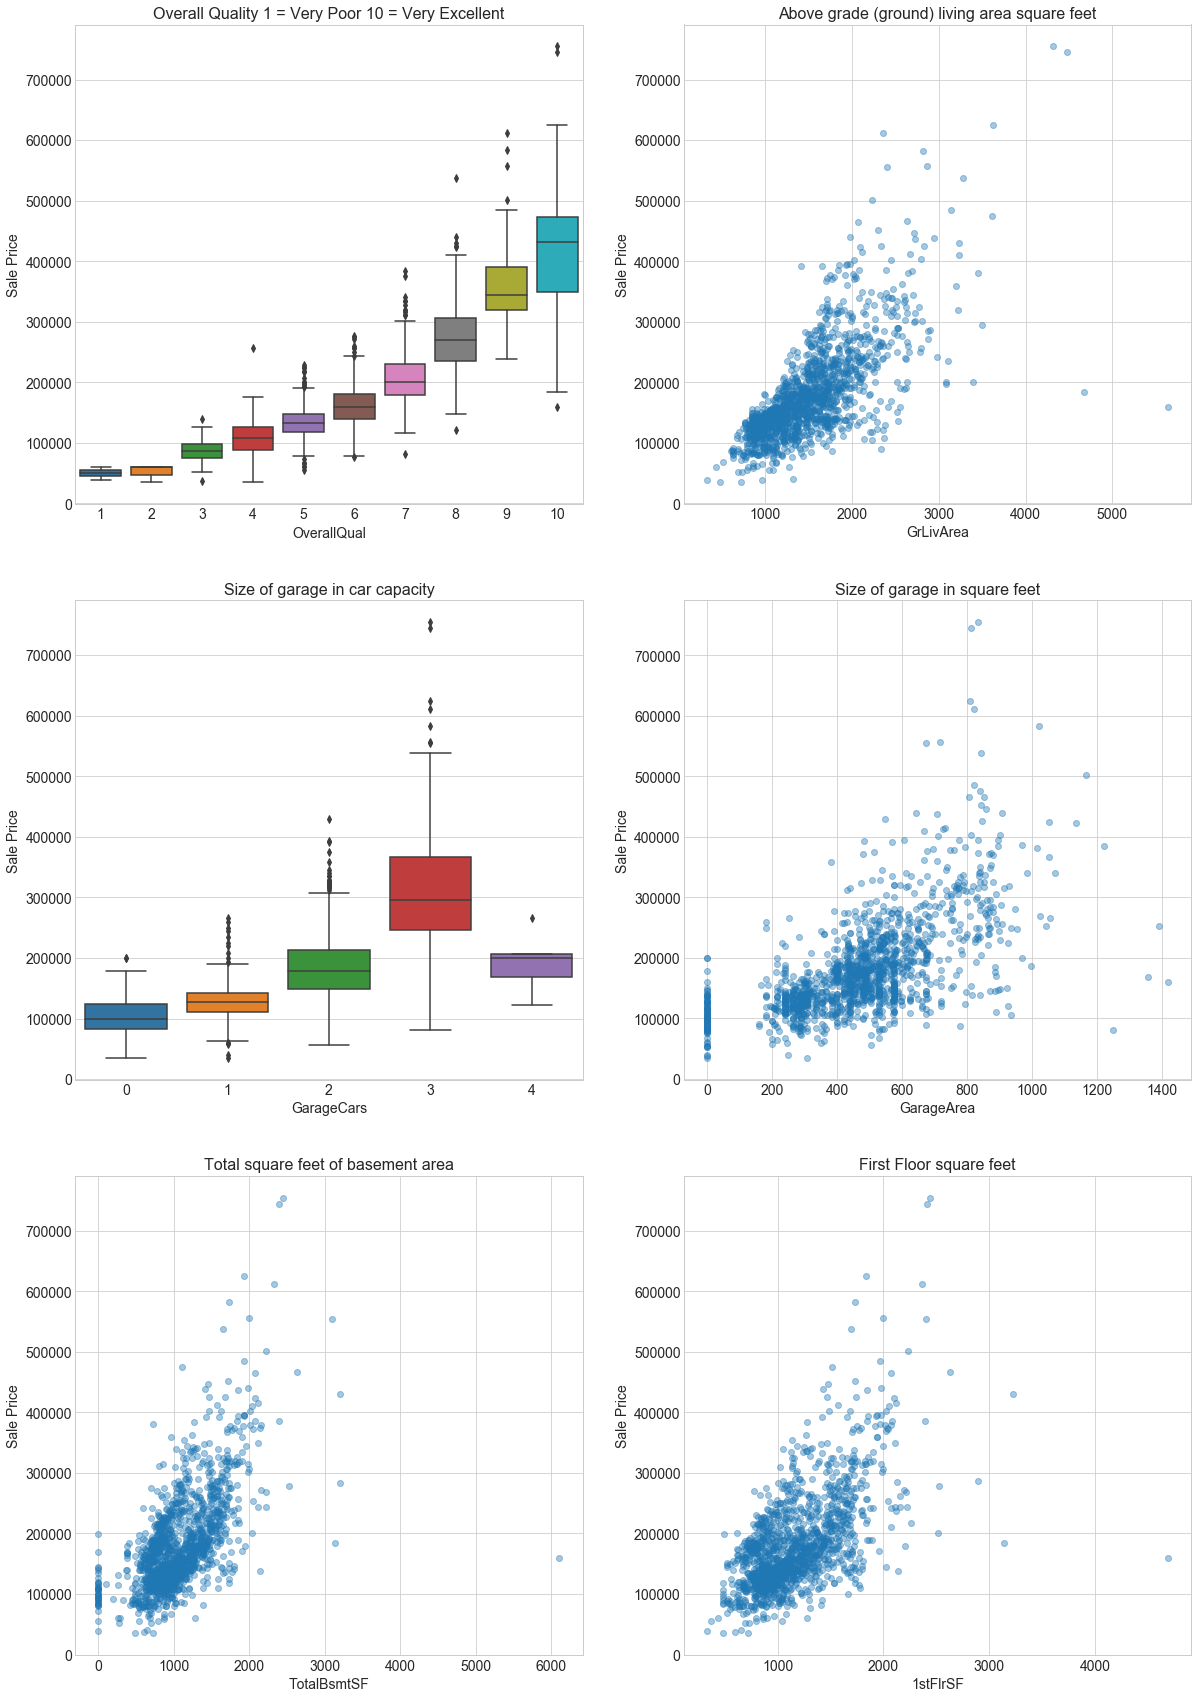

In [12]:
#plots of 10 most highly correlated variables

plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
sns.boxplot(y='SalePrice', x='OverallQual', data=train)
plt.title('Overall Quality 1 = Very Poor 10 = Very Excellent', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('OverallQual', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,2)
sns.regplot(y='SalePrice', x='GrLivArea', data=train,
            fit_reg=False, scatter_kws={'alpha':0.4})
plt.title('Above grade (ground) living area square feet', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('GrLivArea', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,3)
sns.boxplot(y='SalePrice', x='GarageCars', data=train)
plt.title('Size of garage in car capacity', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('GarageCars', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,4)
sns.regplot(y='SalePrice', x='GarageArea', data=train,
            fit_reg=False, scatter_kws={'alpha':0.4})
plt.title('Size of garage in square feet', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('GarageArea', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,5)
sns.regplot(y='SalePrice', x='TotalBsmtSF', data=train,
            fit_reg=False, scatter_kws={'alpha':0.4})
plt.title('Total square feet of basement area', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('TotalBsmtSF', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,6)
sns.regplot(y='SalePrice', x='1stFlrSF', data=train,
            fit_reg=False, scatter_kws={'alpha':0.4})
plt.title('First Floor square feet', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('1stFlrSF', size=14)
plt.ylabel('Sale Price', size=14)

plt.show()

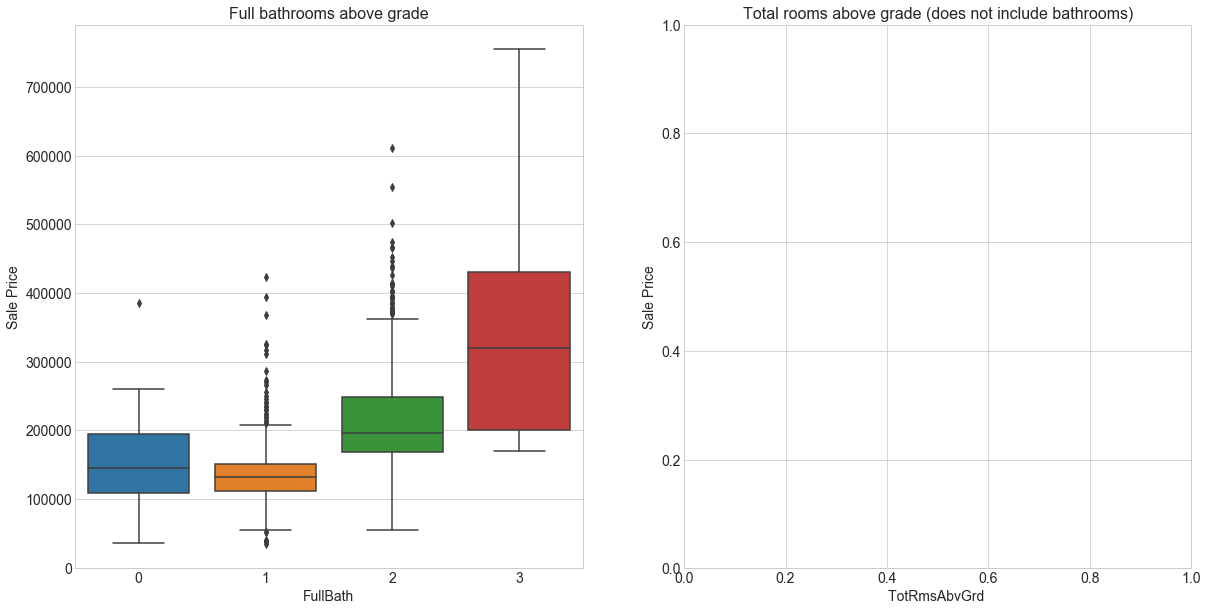

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.boxplot(y='SalePrice', x='FullBath', data=train)
plt.title('Full bathrooms above grade', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('FullBath', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(1,2,2)
#sns.boxplot(y='SalePrice', x='TotRmsAbvGrd ', data=train) #ValueError: Could not interpret input 'TotRmsAbvGrd '
plt.title('Total rooms above grade (does not include bathrooms)', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('TotRmsAbvGrd ', size=14)
plt.ylabel('Sale Price', size=14)

plt.show()

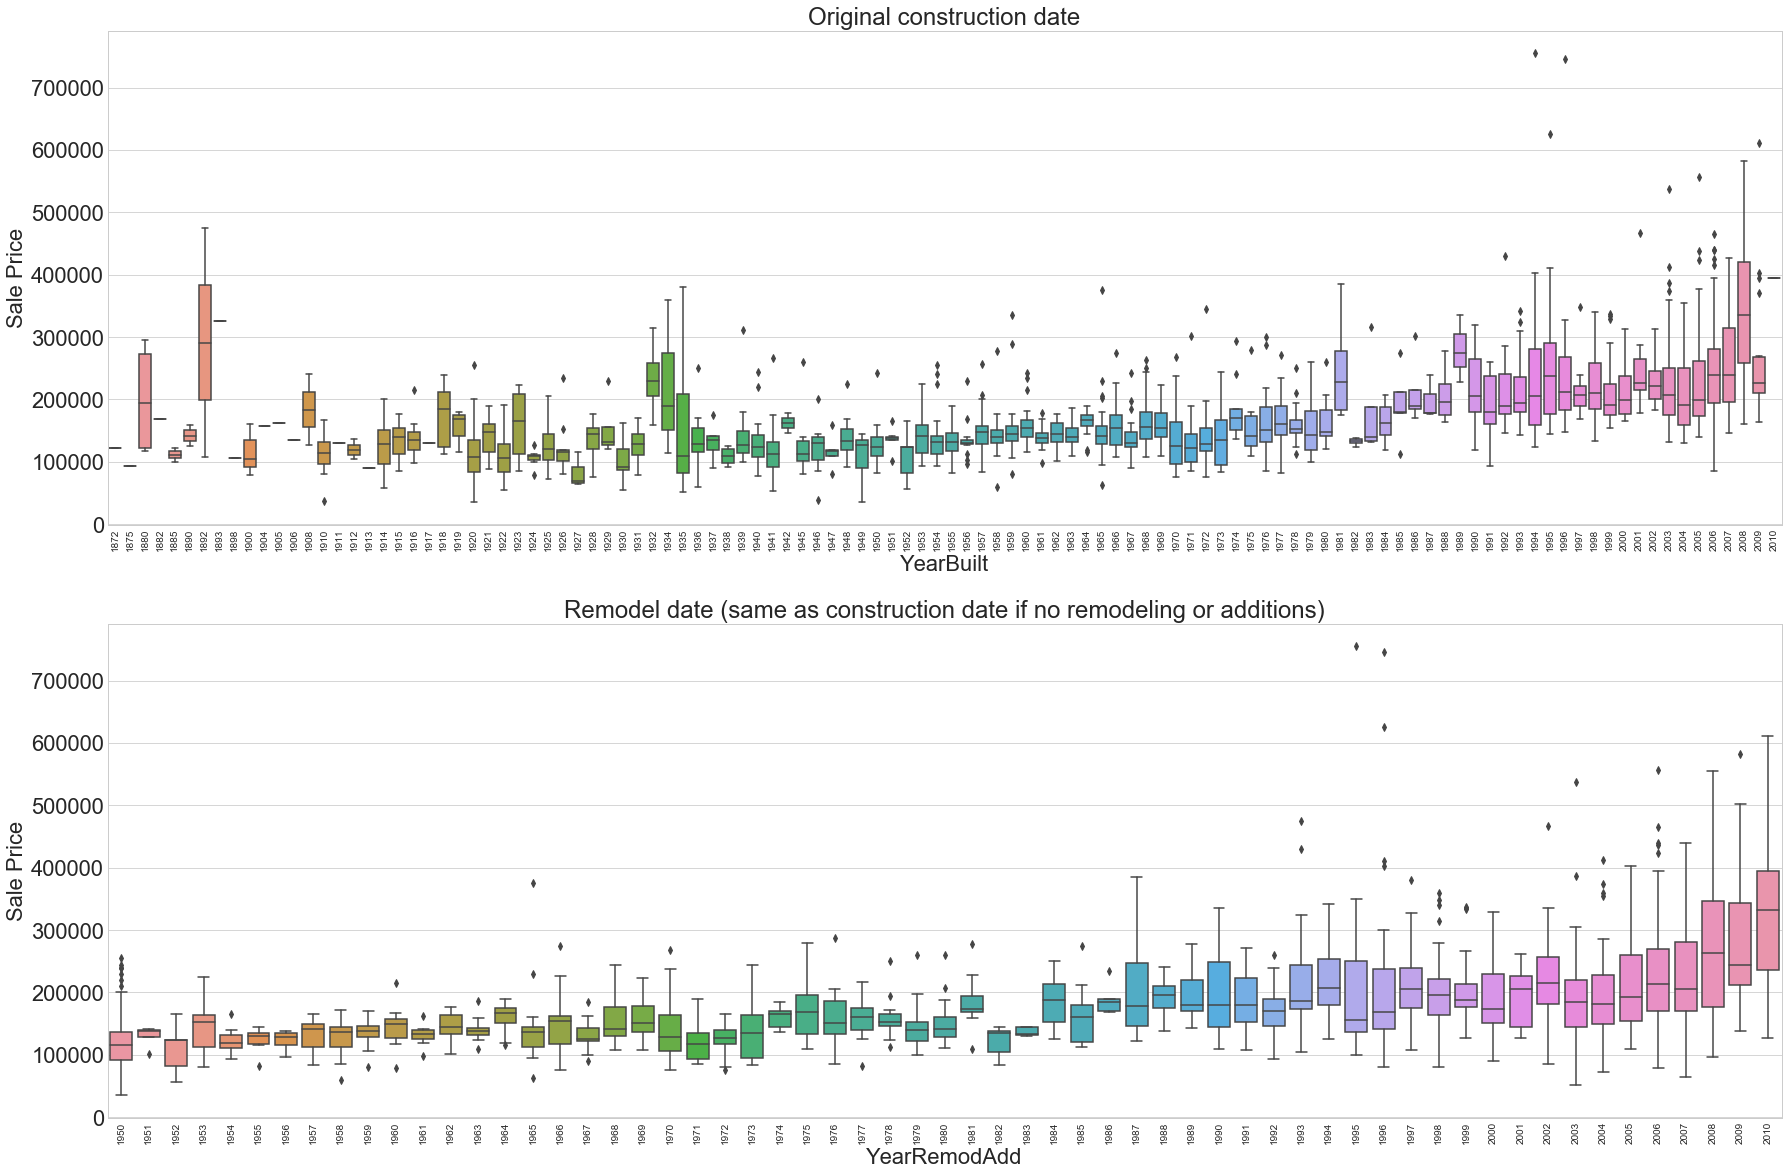

In [14]:
plt.figure(figsize=(30,20))

plt.subplot(2,1,1)
sns.boxplot(y='SalePrice', x='YearBuilt', data=train)
plt.title('Original construction date', size=24)
plt.xticks(rotation=90)
plt.yticks(size=22)
plt.xlabel('YearBuilt', size=22)
plt.ylabel('Sale Price', size=22)

plt.subplot(2,1,2)
sns.boxplot(y='SalePrice', x='YearRemodAdd', data=train)
plt.title('Remodel date (same as construction date if no remodeling or additions)', size=24)
plt.xticks(rotation=90)
plt.yticks(size=22)
plt.xlabel('YearRemodAdd', size=22)
plt.ylabel('Sale Price', size=22)

plt.show()

In [15]:
train.TotRmsAbvGrd 

0        8
1        6
2        6
3        7
4        9
5        5
6        7
7        7
8        8
9        5
10       5
11      11
12       4
13       7
14       5
15       5
16       5
17       6
18       6
19       6
20       9
21       6
22       7
23       6
24       6
25       7
26       5
27       7
28       6
29       4
        ..
1430     7
1431     5
1432     5
1433     8
1434     5
1435     7
1436     5
1437     7
1438     6
1439     6
1440    11
1441     3
1442    10
1443     4
1444     7
1445     6
1446     6
1447     8
1448     6
1449     3
1450     8
1451     7
1452     5
1453     6
1454     6
1455     7
1456     7
1457     9
1458     5
1459     6
Name: TotRmsAbvGrd, Length: 1460, dtype: int64